# Deep Learning Algorithm without using Keras

In [2]:
import numpy as np
import pandas as pd

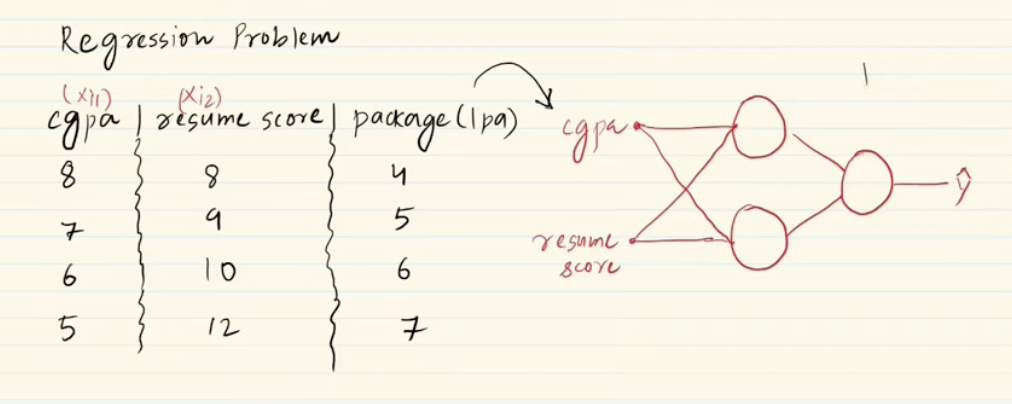

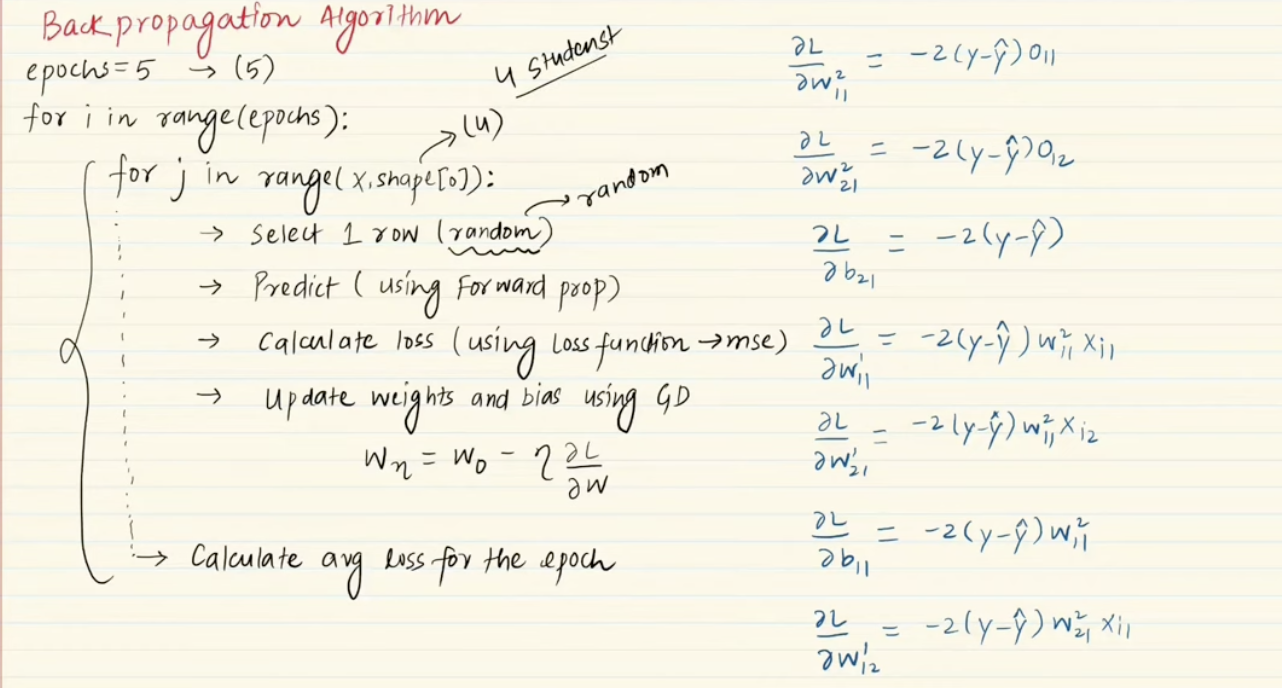

In [5]:
# Making a dataframe
df = pd.DataFrame([[8,8,4],[7,9,5],[6,10,6],[5,12,7]], columns=['cgpa', 'profile_score', 'lpa'])

In [6]:
df

,cgpa,profile_score,lpa
0,8,8,4
1,7,9,5
2,6,10,6
3,5,12,7


In [9]:
"""
Input : Architecture of the model, 
This function is to initialise the weights and bias of the architecture
"""
def initialize_parameters(layer_dims):
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims)

    for l in range(1, L):

        parameters['W' + str(l)] = np.ones((layer_dims[l-1], layer_dims[l]))*0.1
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))


    return parameters

In [11]:
initialize_parameters([2,2,1])

{'W1': array([[0.1, 0.1],
        [0.1, 0.1]]),
 'b1': array([[0.],
        [0.]]),
 'W2': array([[0.1],
        [0.1]]),
 'b2': array([[0.]])}

In [12]:
def linear_forward(A_prev, W, b):

    Z = np.dot(W.T, A_prev) + b

    return Z

In [ ]:
# Forward Prop
def L_layer_forward(X, parameters):

    A = X
    L = len(parameters) // 2                  # number of layers in the neural network

    for l in range(1, L+1):
        A_prev = A
        Wl = parameters['W' + str(l)]
        bl = parameters['b' + str(l)]
        #print("A"+str(l-1)+": ", A_prev)
        #print("W"+str(l)+": ", Wl)
        #print("b"+str(l)+": ", bl)
        #print("--"*20)

    A = linear_forward(A_prev, Wl, bl)
    #print("A"+str(l)+": ", A)
    #print("**"*20)

    return A,A_prev

In [ ]:
X = df[['cgpa', 'profile_score']].values[0].reshape(2,1) # Shape(no of features, no. of training example)
y = df[['lpa']].values[0][0]

# Parameter initialization
parameters = initialize_parameters([2,2,1])

y_hat,A1 = L_layer_forward(X, parameters)

A0:  [[8]
 [8]]
W1:  [[0.1 0.1]
 [0.1 0.1]]
b1:  [[0.]
 [0.]]
----------------------------------------
A1:  [[1.6]
 [1.6]]
****************************************
A1:  [[1.6]
 [1.6]]
W2:  [[0.1]
 [0.1]]
b2:  [[0.]]
----------------------------------------
A2:  [[0.32]]
****************************************


In [ ]:
y_hat = y_hat[0][0]

In [ ]:
A1

array([[1.6],
       [1.6]])

In [ ]:
update_parameters(parameters,y,y_hat,A1,X)

In [ ]:
parameters

{'W1': array([[0.10658137, 0.10658137],
        [0.10658137, 0.10658137]]), 'W2': array([[0.111776],
        [0.111776]]), 'b1': array([[0.00082267],
        [0.00082267]]), 'b2': array([[0.119136]])}

In [ ]:
X = df[['cgpa', 'profile_score']].values[3].reshape(2,1) # Shape(no of features, no. of training example)
y = df[['lpa']].values[3][0]

y_hat,A1 = L_layer_forward(X, parameters)

A0:  [[ 5]
 [12]]
W1:  [[0.12409711 0.13272353]
 [0.12412266 0.13276611]]
b1:  [[0.00355129]
 [0.00355555]]
----------------------------------------
A1:  [[2.11350869]
 [2.26036654]]
****************************************
A1:  [[2.11350869]
 [2.26036654]]
W2:  [[0.14692424]
 [0.14731907]]
b2:  [[0.15810417]]
----------------------------------------
A2:  [[0.80162493]]
****************************************


In [ ]:
update_parameters(parameters,y,y_hat,A1,X)

In [ ]:
parameters

{'W1': array([[0.13482804, 0.15847776],
        [0.1349909 , 0.15884991]]), 'W2': array([[0.17312488],
        [0.17534027]]), 'b1': array([[0.00569748],
        [0.0057292 ]]), 'b2': array([[0.18773702]])}

In [ ]:
def update_parameters(parameters,y,y_hat,A1,X):
  parameters['W2'][0][0] = parameters['W2'][0][0] + (0.001 * 2 * (y - y_hat)*A1[0][0])
  parameters['W2'][1][0] = parameters['W2'][1][0] + (0.001 * 2 * (y - y_hat)*A1[1][0])
  parameters['b2'][0][0] = parameters['W2'][1][0] + (0.001 * 2 * (y - y_hat))

  parameters['W1'][0][0] = parameters['W1'][0][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][0][0]*X[0][0])
  parameters['W1'][0][1] = parameters['W1'][0][1] + (0.001 * 2 * (y - y_hat)*parameters['W2'][0][0]*X[1][0])
  parameters['b1'][0][0] = parameters['b1'][0][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][0][0])

  parameters['W1'][1][0] = parameters['W1'][1][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][1][0]*X[0][0])
  parameters['W1'][1][1] = parameters['W1'][1][1] + (0.001 * 2 * (y - y_hat)*parameters['W2'][1][0]*X[1][0])
  parameters['b1'][1][0] = parameters['b1'][1][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][1][0])

In [ ]:
X = df[['cgpa', 'profile_score']].values[0].reshape(2,1) # Shape(no of features, no. of training example)
y = df[['lpa']].values[0][0]

# Parameter initialization
parameters = initialize_parameters([2,2,1])

y_hat,A1 = L_layer_forward(X,parameters)
y_hat = y_hat[0][0]

update_parameters(parameters,y,y_hat,A1,X)

parameters

{'W1': array([[0.10658137, 0.10658137],
        [0.10658137, 0.10658137]]), 'W2': array([[0.111776],
        [0.111776]]), 'b1': array([[0.00082267],
        [0.00082267]]), 'b2': array([[0.119136]])}

In [ ]:
X = df[['cgpa', 'profile_score']].values[1].reshape(2,1) # Shape(no of features, no. of training exaplme)
y = df[['lpa']].values[1][0]

y_hat,A1 = L_layer_forward(X,parameters)
y_hat = y_hat[0][0]

update_parameters(parameters,y,y_hat,A1,X)

parameters

{'W1': array([[0.11458955, 0.1168776 ],
        [0.11458955, 0.1168776 ]]), 'W2': array([[0.12712927],
        [0.12712927]]), 'b1': array([[0.0019667],
        [0.0019667]]), 'b2': array([[0.13612818]])}

In [ ]:
X = df[['cgpa', 'profile_score']].values[2].reshape(2,1) # Shape(no of features, no. of training exaplme)
y = df[['lpa']].values[2][0]

y_hat,A1 = L_layer_forward(X,parameters)
y_hat = y_hat[0][0]

update_parameters(parameters,y,y_hat,A1,X)

parameters

{'W1': array([[0.12409711, 0.13272353],
        [0.12412266, 0.13276611]]), 'W2': array([[0.14692424],
        [0.14731907]]), 'b1': array([[0.00355129],
        [0.00355555]]), 'b2': array([[0.15810417]])}

In [ ]:
X = df[['cgpa', 'profile_score']].values[3].reshape(2,1) # Shape(no of features, no. of training exaplme)
y = df[['lpa']].values[3][0]

y_hat,A1 = L_layer_forward(X,parameters)
y_hat = y_hat[0][0]

update_parameters(parameters,y,y_hat,A1,X)

parameters

{'W1': array([[0.13482804, 0.15847776],
        [0.1349909 , 0.15884991]]), 'W2': array([[0.17312488],
        [0.17534027]]), 'b1': array([[0.00569748],
        [0.0057292 ]]), 'b2': array([[0.18773702]])}

In [ ]:
# epochs implementation

parameters = initialize_parameters([2,2,1])
epochs = 5

for i in range(epochs):

  Loss = []

  for j in range(df.shape[0]):

    X = df[['cgpa', 'profile_score']].values[j].reshape(2,1) # Shape(no of features, no. of training example)
    y = df[['lpa']].values[j][0]

    # Parameter initialization


    y_hat,A1 = L_layer_forward(X,parameters)
    y_hat = y_hat[0][0]

    update_parameters(parameters,y,y_hat,A1,X)

    Loss.append((y-y_hat)**2)

  print('Epoch - ',i+1,'Loss - ',np.array(Loss).mean())

parameters

Epoch -  1 Loss -  25.321744156025517
Epoch -  2 Loss -  18.320004165722047
Epoch -  3 Loss -  9.473661050729628
Epoch -  4 Loss -  3.2520938634031613
Epoch -  5 Loss -  1.3407132589299962


{'W1': array([[0.26507636, 0.38558861],
        [0.27800387, 0.40980287]]), 'W2': array([[0.41165744],
        [0.48302736]]), 'b1': array([[0.02749056],
        [0.02974394]]), 'b2': array([[0.48646246]])}